In [1]:
%load_ext autoreload
%autoreload 2

from mair_tools import notebook_utils
import pandas as pd
import matplotlib
import pickle
import re
import os
import spacy
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy.lang.en

PICKLED_PATH = "parserd_pdfs.pkl"

In [2]:
if not os.path.exists(PICKLED_PATH):
    pdfs = notebook_utils.parse_all_files_from_path("../articles/FAT_20/")
    with open("PICKLED_PATH", "wb+") as f:
        pickle.dump(pdfs, f)
else:
    with open(PICKLED_PATH, "rb") as f:
        pdfs = pickle.load(f)

# Cleaning

In [3]:
df = pd.DataFrame(pdfs)
df['pages_num']=df.pages.str.len()

<AxesSubplot:>

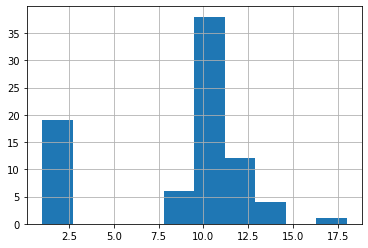

In [4]:
df.pages_num.hist()

### Removing papers with only one page

<AxesSubplot:>

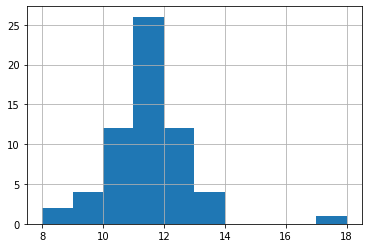

In [5]:
df=df[df.pages_num!=1]
df.pages_num.hist()

### Removing references and bibliography

In [12]:
def clean_text(text):
    # removing bibliography
    position = text.lower().rfind("references")
    text = text[:position]

    text = text.replace("\n", " ")  # removing newlines

    text = re.sub("\[[^\[^\]]*\]", "", text)  # removing references
    return text

In [13]:
df['cleaned_text']=df.full_text.apply(clean_text)

# Keywords

In [9]:
en=spacy.load('en_core_web_lg')

In [22]:
en = spacy.lang.en.English()

In [28]:
tokenized = df.cleaned_text.apply(lambda x: en(x))

In [40]:
lemmas = tokenized.apply(
    lambda doc: " ".join(
        [word.lemma_.lower() for word in doc if not word.is_stop if word.is_alpha]
    )
)

In [67]:
tfidf = TfidfVectorizer()

In [71]:
tf = tfidf.fit_transform(lemmas)
tf = tf.todense()
tf = np.array(tf)

In [72]:
words = np.array(tfidf.get_feature_names())

In [74]:
#words[tf.argmax(1)]
tf.argsort()

array([[    0, 11901, 11902, ...,  5834,  1890,  9926],
       [    0, 11779, 11780, ...,  2170, 13017, 13012],
       [    0, 11833, 11834, ...,  2607, 17612, 14522],
       ...,
       [    0, 11808, 11809, ...,  7727,  7724, 15825],
       [    0, 11874, 11875, ...,   208, 18123,   318],
       [    0, 11871, 11872, ...,  5724, 12311, 15925]], dtype=int64)